In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# My axis should display 10⁻¹ but you can switch to e-notation 1.00e+01
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
    # return f"{10**val:.2e}"      # e-Notation

plt.style.use('default')
linewidth = 1

list = ("List", "#E56399")
listrev = ("ListRev", "#E66363")
sek = ("Sek", "#BC8BE7")
deque = ("Deque", "#7FD1B9")
steque = ("Steque", "#72A8B0")
cadeque = ("Cadeque", "#647FA6")
kot = ("KOT", "#FFAF02")

In [86]:
def make_time_data_2D(data, name):
    times = data[name + "T"]
    occur = data[name + "N"]
    Y = []
    for t, n in zip(times, occur):
        if n == 0:
            Y.append(0.)
        else:
            Y.append(t / n)
    return np.array(Y)

def plot_time_data_2D(target, data, data_structures, scale='linear'):
    plt.xlim(0, 1)

    names = [n for n, _ in data_structures]
    colors = [c for _, c in data_structures]
    Ys = [make_time_data_2D(data, n) for n in names]

    buffers = len(Ys[0])
    X = np.arange(buffers)

    for n, c, Y in zip(names, colors, Ys):
        plt.scatter(X, Y, s=[15 for _ in X], color=c)
        plt.plot(Y, label=n, color=c, linewidth=linewidth)

    plt.xlabel("size group")
    plt.xticks(X, ["G" + str(i) for i in range(buffers)], rotation=45)
    plt.ylabel("time (µs)")
    plt.yscale(scale)

    plt.grid()
    plt.legend()
    plt.tight_layout()  # avoid a cropping problem with savefig
    plt.savefig(target) # save to file before showing
    plt.show()

def make_time_data_3D(data, name):
    times = data[name + "T"]
    occur = data[name + "N"]
    s = int (np.sqrt(len(times.to_list())))
    Z = []
    Zline = []
    for t, n in zip(times, occur):
        if n == 0:
            z = None
        else:
            z = t / n
        if len(Zline) == s:
            Z.append(Zline)
            Zline = [z]
        else:
            Zline.append(z)
    Z.append(Zline)
    Z = np.array(Z).astype(np.double)
    return Z, np.isfinite(Z)

def plot_time_data_3D(data, data_structures, view=None):
    names = [n for n, _ in data_structures]
    colors = [c for _, c in data_structures]
    Zs = [make_time_data_3D(data, n) for n in names]

    buffers = len(Zs[0][0])
    T = np.arange(buffers)
    S = np.array([[15 for _ in T] for _ in T])

    fig = plt.figure(figsize=(10., 10.))
    ax = fig.add_subplot(111, projection='3d')
    for n, c, (Z, Zmask) in zip(names, colors, Zs):
        for i in range(buffers):
            ax.scatter(np.full(buffers, i)[Zmask[i, :]], T[Zmask[i, :]], np.log10(Z[i, Zmask[i, :]]), s=S[i, Zmask[i, :]], color=c)
            ax.plot(np.full(buffers, i)[Zmask[i, :]], T[Zmask[i, :]], np.log10(Z[i, Zmask[i, :]]), color=c, linewidth=linewidth)
        for j in range(buffers):
            ax.scatter(T[Zmask[:, j]], np.full(buffers, j)[Zmask[:, j]], np.log10(Z[Zmask[:, j], j]), s=S[Zmask[:, j], j], color=c)
            ax.plot(T[Zmask[:, j]], np.full(buffers, j)[Zmask[:, j]], np.log10(Z[Zmask[:, j], j]), color=c, linewidth=linewidth)

    ax.set_xlabel("size group of the first argument")
    ax.invert_xaxis()
    ax.set_xticks(T, ["G" + str(i) for i in range(buffers)], rotation=45)
    ax.set_ylabel("size group of the second argument")
    ax.set_yticks(T, ["G" + str(i) for i in range(buffers)], rotation=-45)
    ax.set_zlabel("time (µs)")
    ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
    ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    if view:
        ax.view_init(**view)

    plt.show()


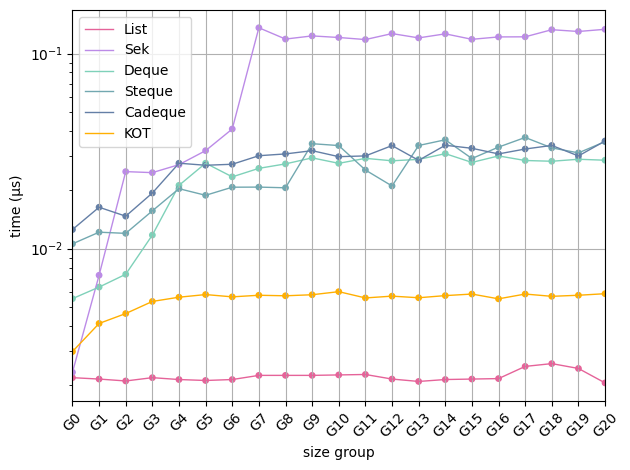

In [87]:
# Graph for push
data = pd.read_csv("./tmp/push.csv")
plot_time_data_2D("./tmp/push.pdf", data, [list, sek, deque, steque, cadeque, kot], scale='log')

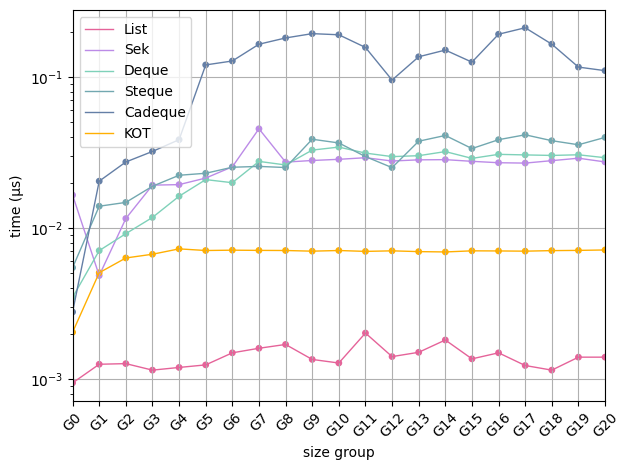

In [88]:
# Graph for pop
data = pd.read_csv("./tmp/pop.csv")
plot_time_data_2D("./tmp/pop.pdf", data, [list, sek, deque, steque, cadeque, kot], scale='log')

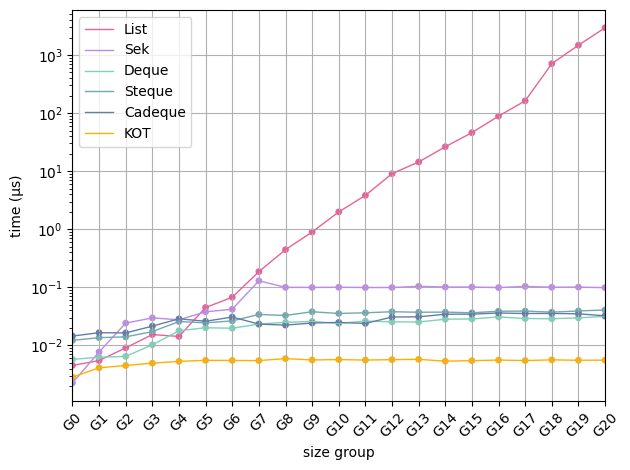

In [89]:
# Graph for inject
data = pd.read_csv("./tmp/inject.csv")
plot_time_data_2D("./tmp/inject.pdf", data, [list, sek, deque, steque, cadeque, kot], scale='log')

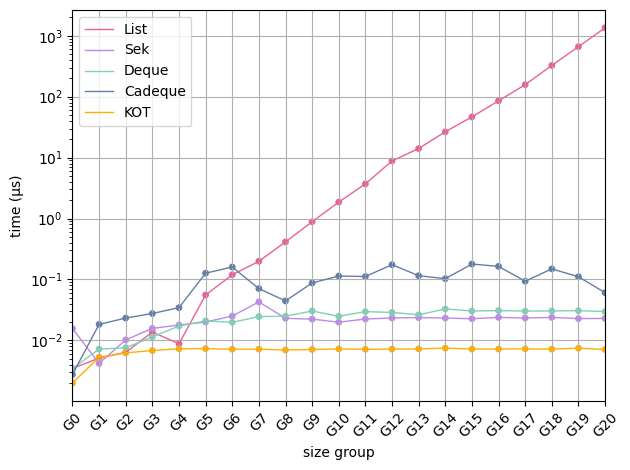

In [90]:
# Graph for eject
data = pd.read_csv("./tmp/eject.csv")
plot_time_data_2D("./tmp/eject.pdf", data, [list, sek, deque, cadeque, kot], scale='log')

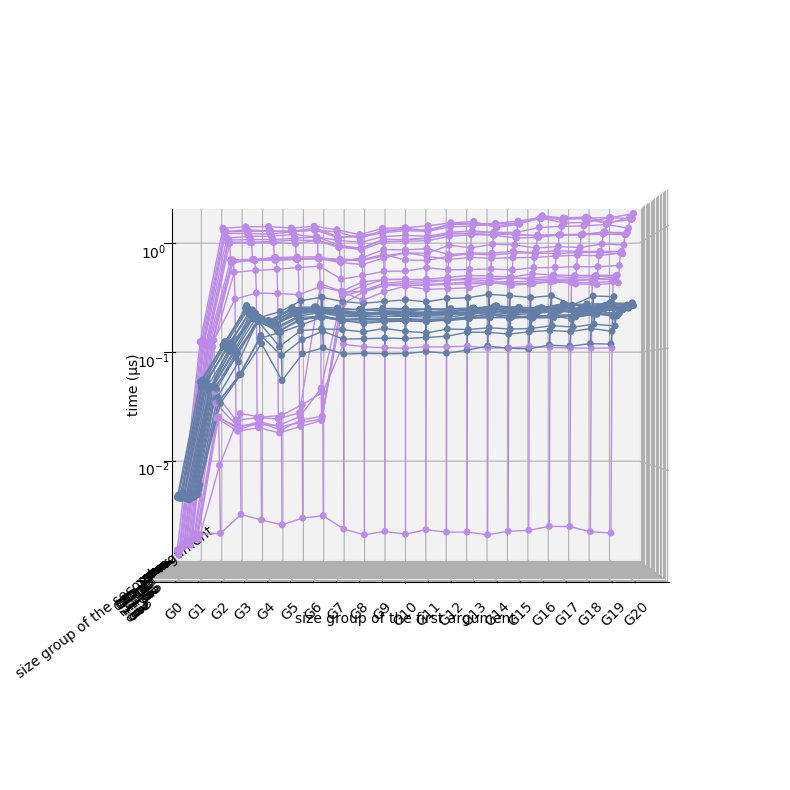

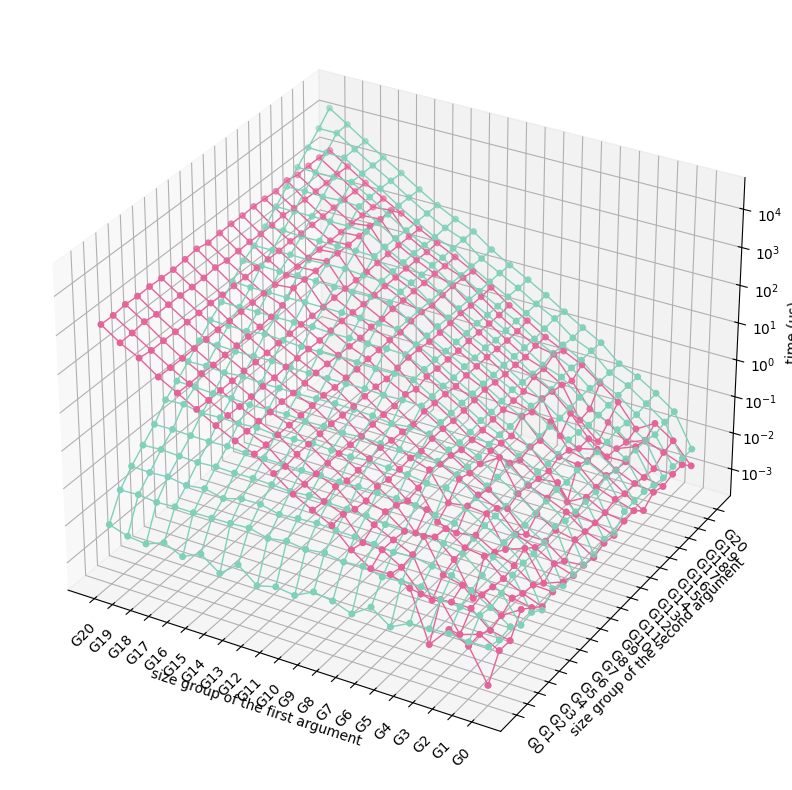

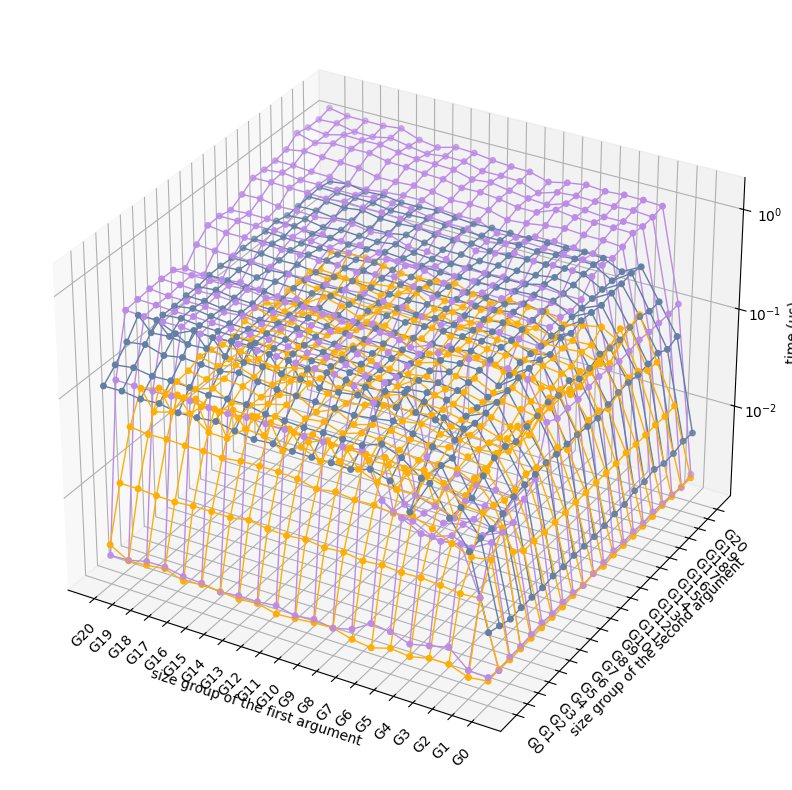

In [91]:
# Graph for concat
data = pd.read_csv("./tmp/concat.csv")
view = {"elev" : 0, "azim" : 90, "roll" : 0}
# plot_time_data_3D(data, [list, sek, steque, cadeque, kot], view)
plot_time_data_3D(data, [sek, cadeque], view)
plot_time_data_3D(data, [list, deque])
plot_time_data_3D(data, [sek, cadeque, kot])

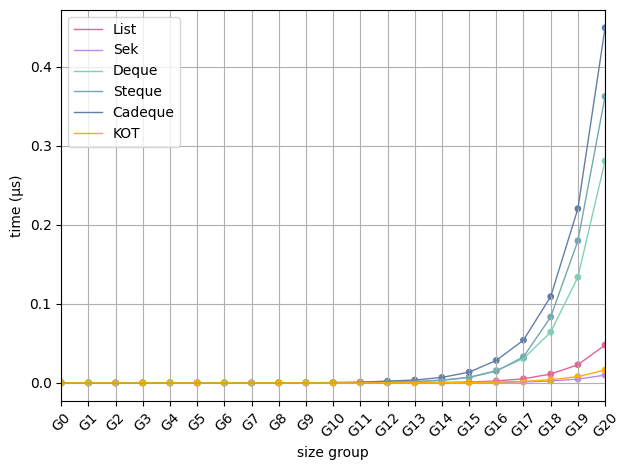

In [92]:
# Graph for traces
data = pd.read_csv("./tmp/traces.csv")
plot_time_data_2D("./tmp/traces.pdf", data, [list, sek, deque, steque, cadeque, kot])